In [4]:
import tensorflow as tf 
from tensorflow.keras import models, layers 
import matplotlib.pyplot as plt

In [5]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("Dataset", shuffle = "True", image_size = (IMAGE_SIZE, IMAGE_SIZE), batch_size = BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [7]:
class_names = dataset.class_names 
class_names 

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
len(dataset)

68

In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[189. 187. 192.]
  [176. 174. 179.]
  [174. 172. 177.]
  ...
  [178. 181. 190.]
  [151. 154. 163.]
  [158. 161. 170.]]

 [[178. 176. 181.]
  [181. 179. 184.]
  [187. 185. 190.]
  ...
  [162. 165. 174.]
  [143. 146. 155.]
  [153. 156. 165.]]

 [[186. 184. 189.]
  [184. 182. 187.]
  [181. 179. 184.]
  ...
  [165. 168. 177.]
  [157. 160. 169.]
  [169. 172. 181.]]

 ...

 [[136. 129. 136.]
  [136. 129. 136.]
  [149. 142. 149.]
  ...
  [139. 136. 145.]
  [133. 130. 139.]
  [111. 108. 117.]]

 [[129. 122. 129.]
  [136. 129. 136.]
  [148. 141. 148.]
  ...
  [133. 130. 139.]
  [127. 124. 133.]
  [106. 103. 112.]]

 [[149. 142. 149.]
  [145. 138. 145.]
  [143. 136. 143.]
  ...
  [132. 129. 138.]
  [129. 126. 135.]
  [114. 111. 120.]]], shape=(256, 256, 3), dtype=float32)


In [10]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


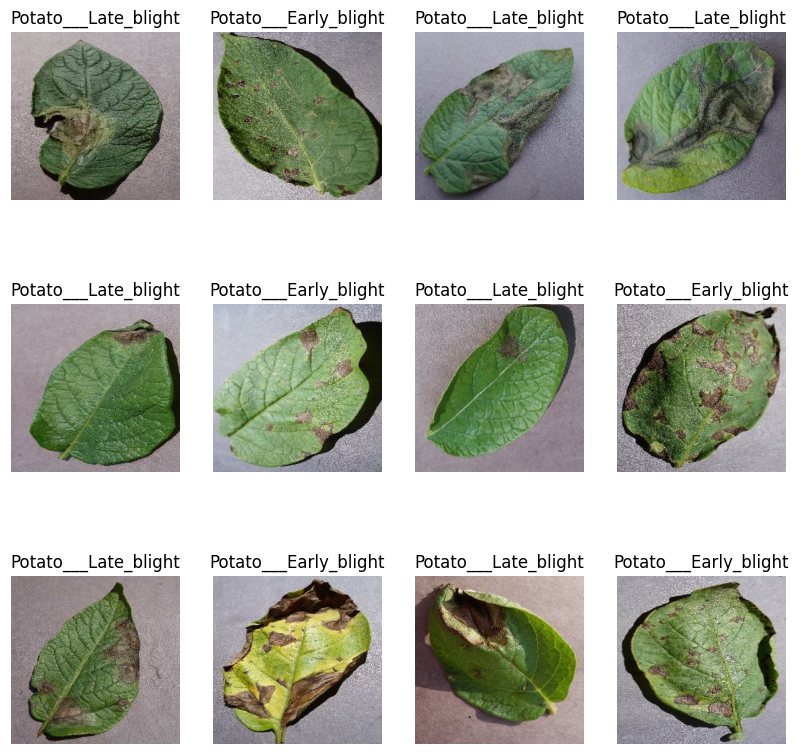

In [11]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12) :
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")


In [21]:
len(dataset)

68

In [22]:
train_size = 0.8
len(dataset) * train_size

54.400000000000006

In [23]:
train_ds = dataset.take(54)
len(train_ds)

54

In [24]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [25]:
val_size =  0.1
len(dataset) * val_size

6.800000000000001

In [26]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [27]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [36]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True,shuffle_size=10000) :
    assert(train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle :
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [37]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [38]:
len(train_ds)

54

In [39]:
len(val_ds)

6

In [40]:
len(test_ds)

8